In this code we take Oct 1st, 2021 - Dec31st 2024 as training and Jan 1st, 2025 - Aug 21st, 2025 as test. So we are doing a "forward regression" (FR). Can't use 'year' as feature due to overfitting, so we do detrending (DT) using year first. Modelling is done in UTC.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import required libraries
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#load data/AllWeathDTypes_NWPP_10yrs.csv as a dataframe
DFX = pd.read_csv("../data/tempFE_AllWeath_regNWPP_2021-2025.csv")
DFY = pd.read_csv("../data/RTLoad_MIDC+NW_1Sep21-23Sep25.csv").drop(['objectid','yes_objectid','iso','timezone'], axis=1)
DFY['datetime'] = pd.to_datetime(DFY['datetime'])
# DFY['datetime'] = DFY['datetime'] - pd.Timedelta(hours=7)
DFX['datetime'] = pd.to_datetime(DFX['datetime'])

In [3]:
currentdate = pd.Timestamp.now().strftime("%Y%m%d")
#create a folder in "../ML_results/" with the current date if it doesn't exist
import os
if not os.path.exists(f"../ML_results/{currentdate}"):
    os.makedirs(f"../ML_results/{currentdate}")

In [4]:
DFX.head()

,station_name,datetime,cloudCover,dewpoint,temperature,windDirection,windSpeed,24hrMaxTempDelt,1WMaxTempDelt,24hrTempCDD,24hrTempHDD,1WTempCDD,1WTempHDD
0,Billings,2021-09-08 00:00:00,19.0,36.0,83.0,70.0,12.0,21.0,24.0,179.0,55.0,816.0,663.0
1,Billings,2021-09-08 01:00:00,50.0,38.0,79.0,60.0,8.0,21.0,24.0,179.0,55.0,813.0,663.0
2,Billings,2021-09-08 02:00:00,19.0,38.0,75.0,60.0,8.0,21.0,24.0,176.0,55.0,809.0,663.0
3,Billings,2021-09-08 03:00:00,0.0,38.0,71.0,50.0,8.0,21.0,24.0,171.0,55.0,806.0,663.0
4,Billings,2021-09-08 04:00:00,0.0,35.0,69.0,30.0,8.0,21.0,24.0,164.0,55.0,802.0,663.0


Running regression for 7 zones: ['BPA', 'Portland General Electric Company', 'Puget Sound Energy, Inc.', 'Avista Corporation', 'City of Tacoma, Department of Public Utilities', 'Seattle City Light', 'Idaho Power Company']

--- Processing BPA ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 08:00:00
Training data shape: (28512, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9441
  Improved! New best Test R²: 0.9462
  Improved! New best Test R²: 0.9466

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 5, 'gamma': 0.1}
R-squared on training data: 0.9945
R-squared on test data: 0.9466
MAPE on training data: 0.89%
MAPE on test data: 2.71%
R-squared on validation data: 0.8909
MAPE on validation data: 3.97%


C:\Users\kumar\AppData\Local\Temp\ipykernel_21484\3553456004.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({


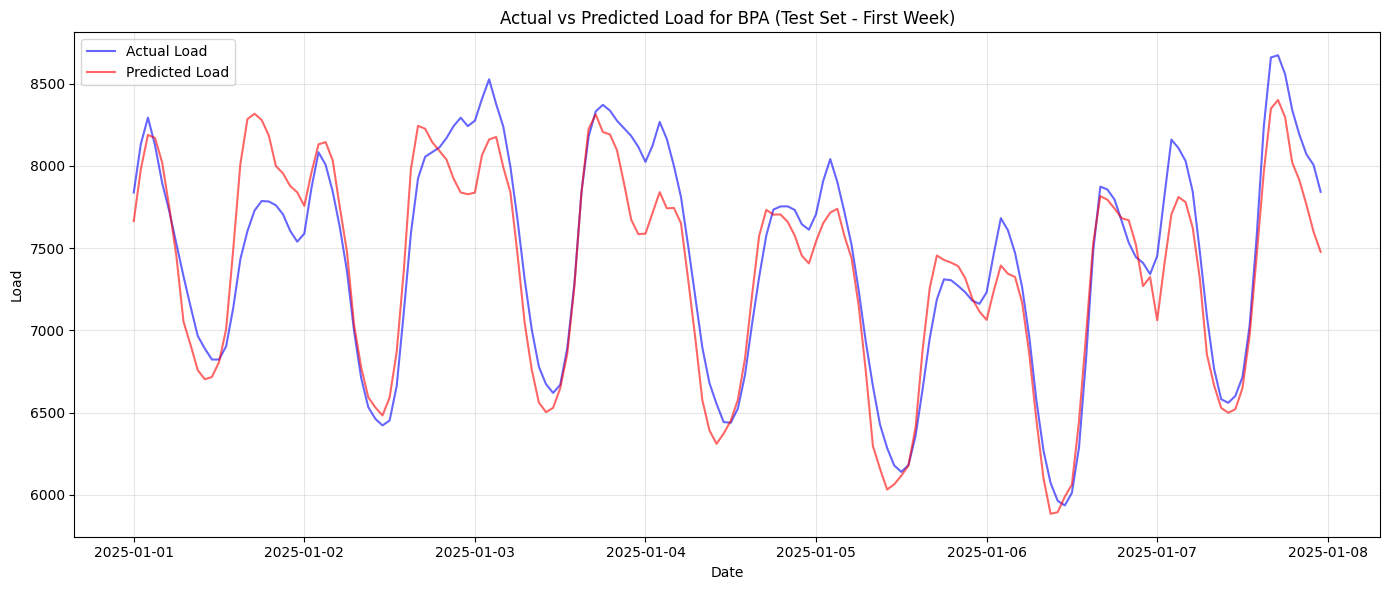

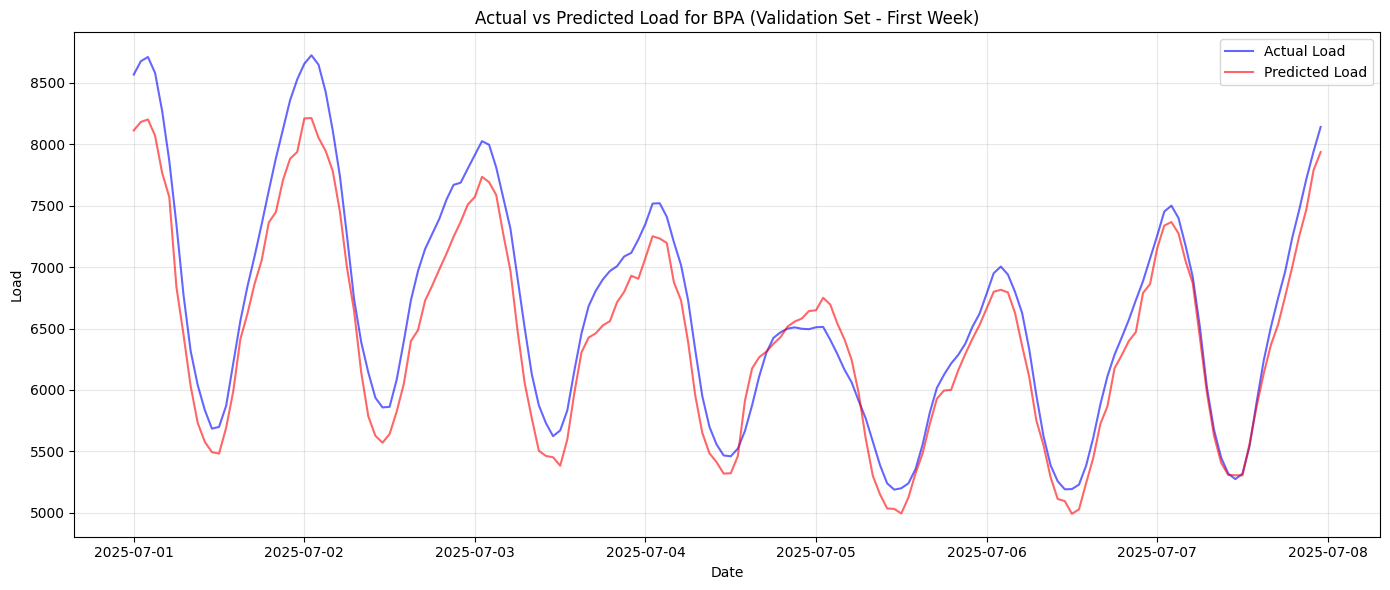


--- Processing Portland General Electric Company ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (28512, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9226
  Improved! New best Test R²: 0.9231
  Improved! New best Test R²: 0.9235
  Improved! New best Test R²: 0.9249
  Improved! New best Test R²: 0.9253

Training final model with best parameters:
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 1.0, 'colsample_bytree': 0.8, 'min_child_weight': 7, 'gamma': 0.1}
R-squared on training data: 0.9961
R-squared on test data: 0.9253
MAPE on training data: 0.78%
MAPE on test data: 3.47%
R-squared on validation data: 0.8854
MAPE on validation data: 5.46%


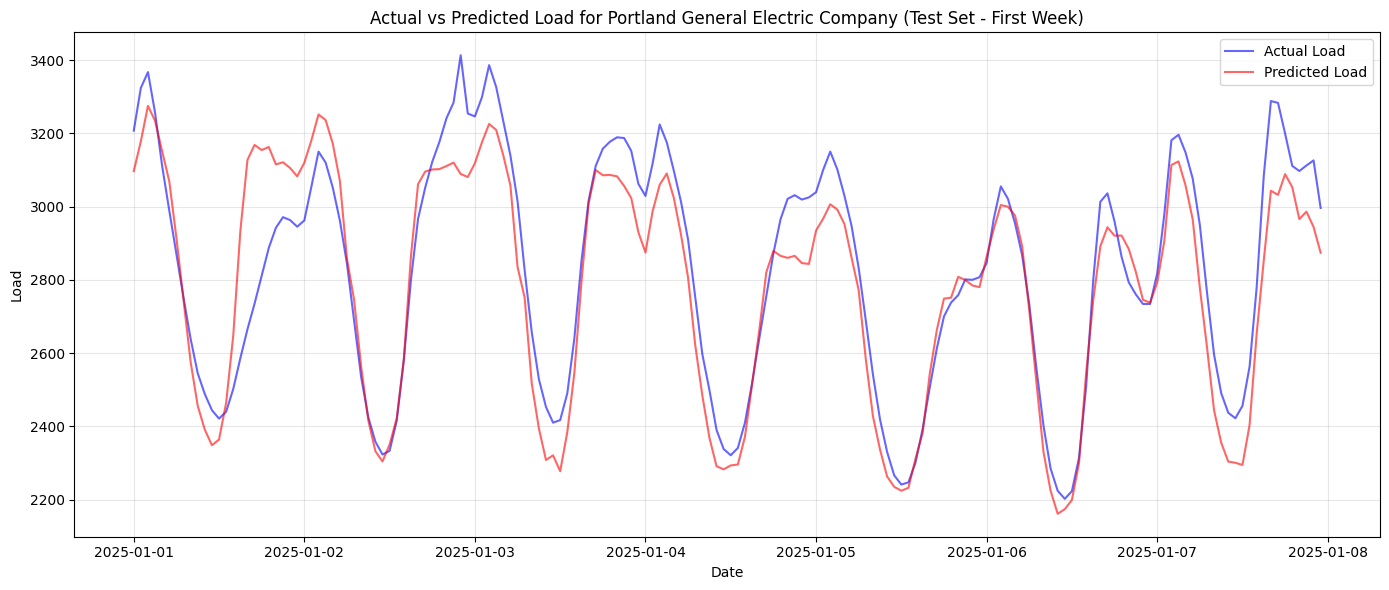

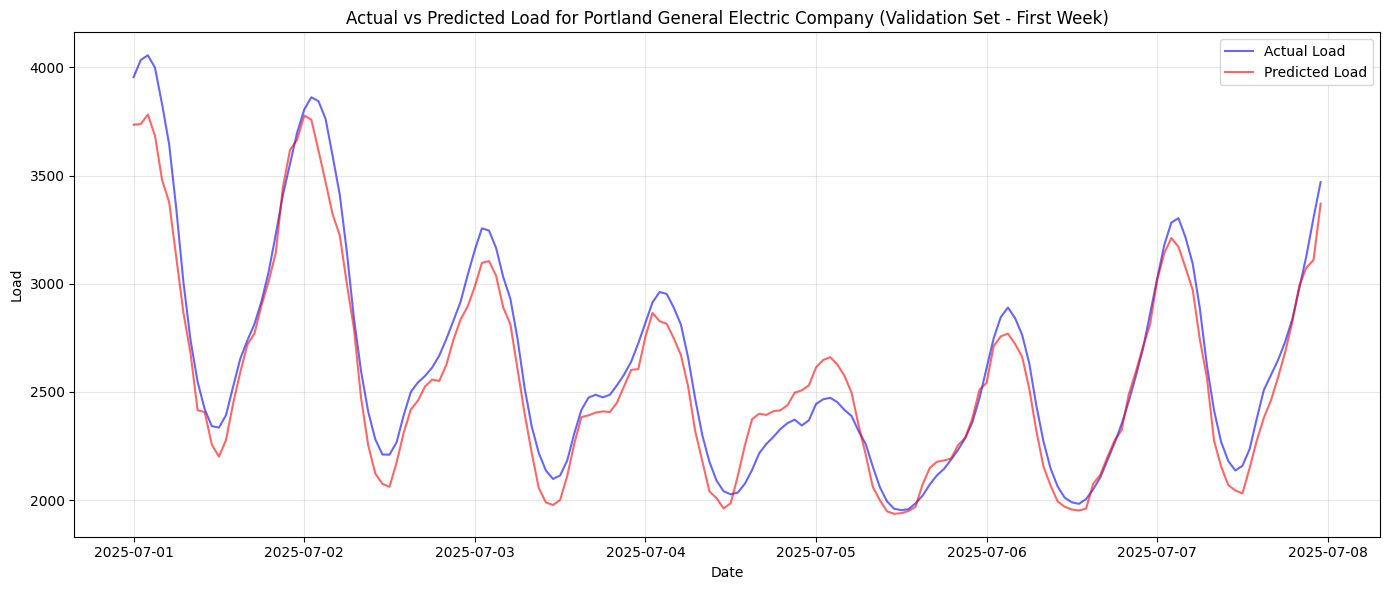


--- Processing Puget Sound Energy, Inc. ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (28512, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9619
  Improved! New best Test R²: 0.9626
  Improved! New best Test R²: 0.9628
  Improved! New best Test R²: 0.9635
  Improved! New best Test R²: 0.9645

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.7, 'min_child_weight': 7, 'gamma': 0.1}
R-squared on training data: 0.9978
R-squared on test data: 0.9645
MAPE on training data: 0.73%
MAPE on test data: 2.99%
R-squared on validation data: 0.9555
MAPE on validation data: 3.04%


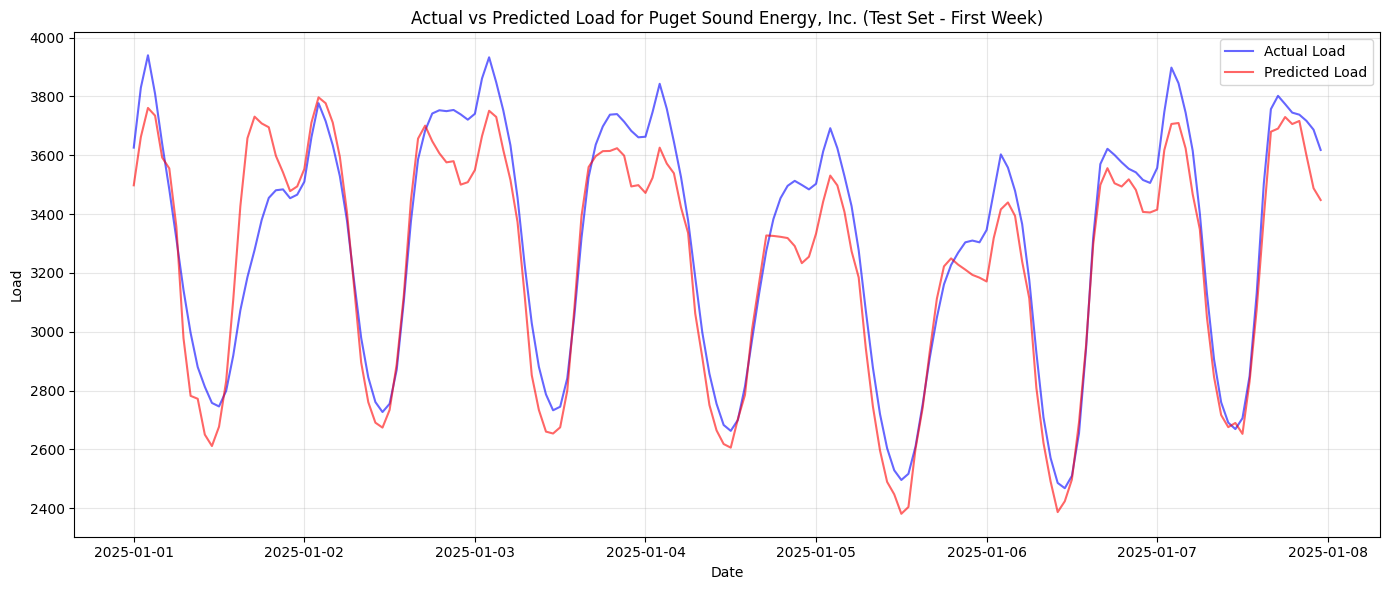

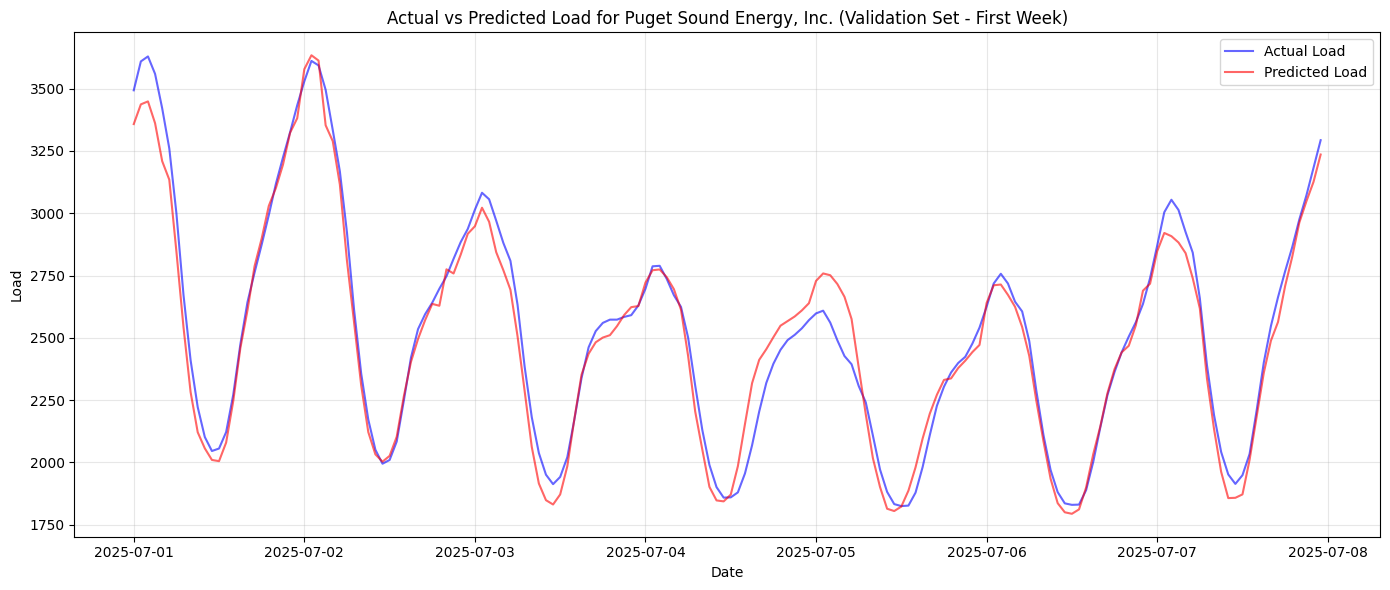


--- Processing Avista Corporation ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (24986, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9659
  Improved! New best Test R²: 0.9669
  Improved! New best Test R²: 0.9676
  Improved! New best Test R²: 0.9678
  Improved! New best Test R²: 0.9690

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 7, 'gamma': 0.1}
R-squared on training data: 0.9979
R-squared on test data: 0.9690
MAPE on training data: 0.74%
MAPE on test data: 2.60%
R-squared on validation data: 0.9616
MAPE on validation data: 3.20%


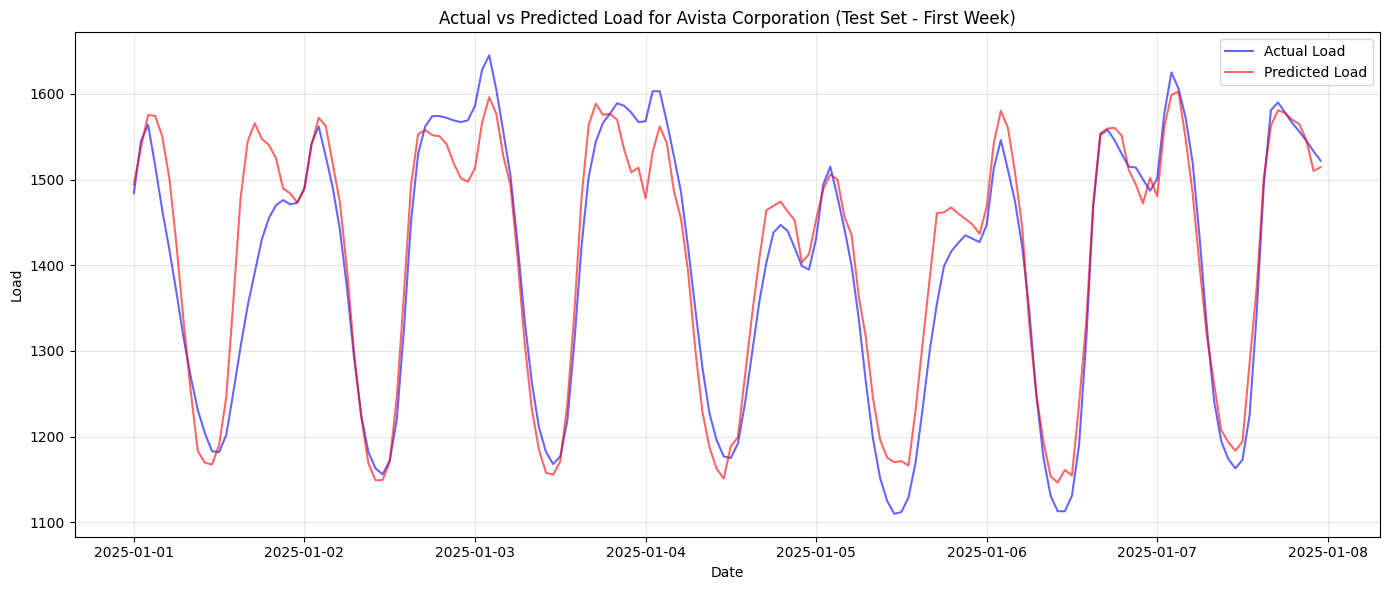

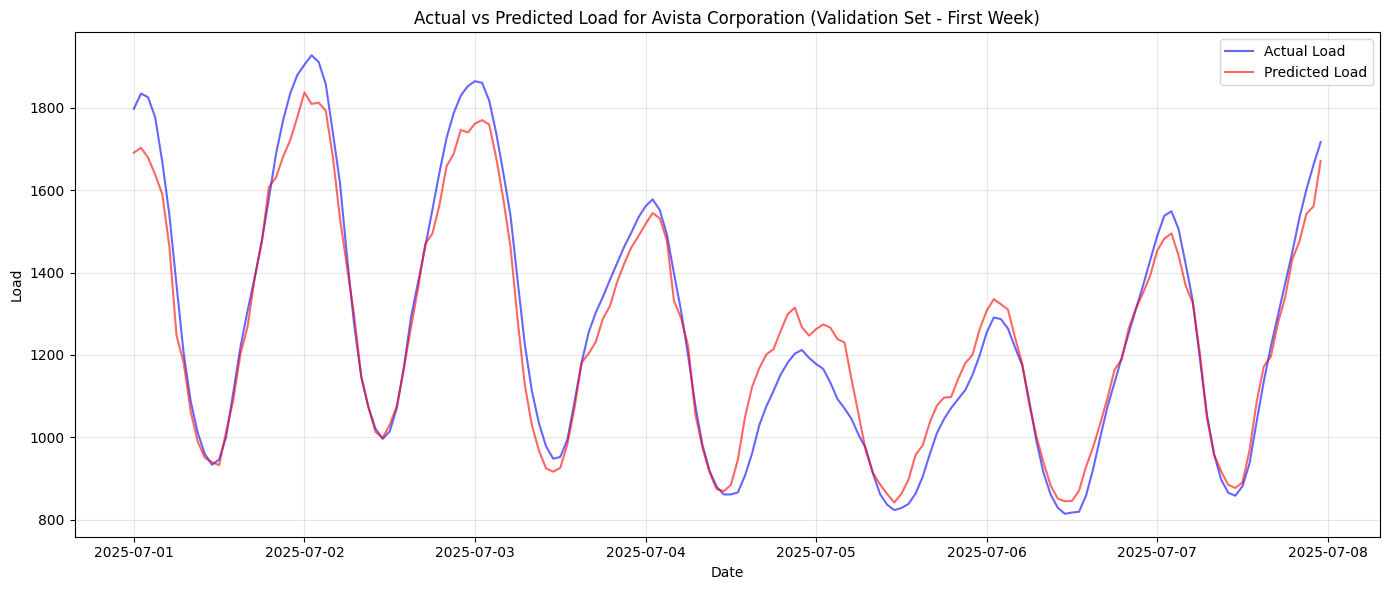


--- Processing City of Tacoma, Department of Public Utilities ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (24986, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9717
  Improved! New best Test R²: 0.9718
  Improved! New best Test R²: 0.9725
  Improved! New best Test R²: 0.9732
  Improved! New best Test R²: 0.9738

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_child_weight': 7, 'gamma': 0.1}
R-squared on training data: 0.9980
R-squared on test data: 0.9738
MAPE on training data: 0.74%
MAPE on test data: 2.82%
R-squared on validation data: 0.9609
MAPE on validation data: 2.79%


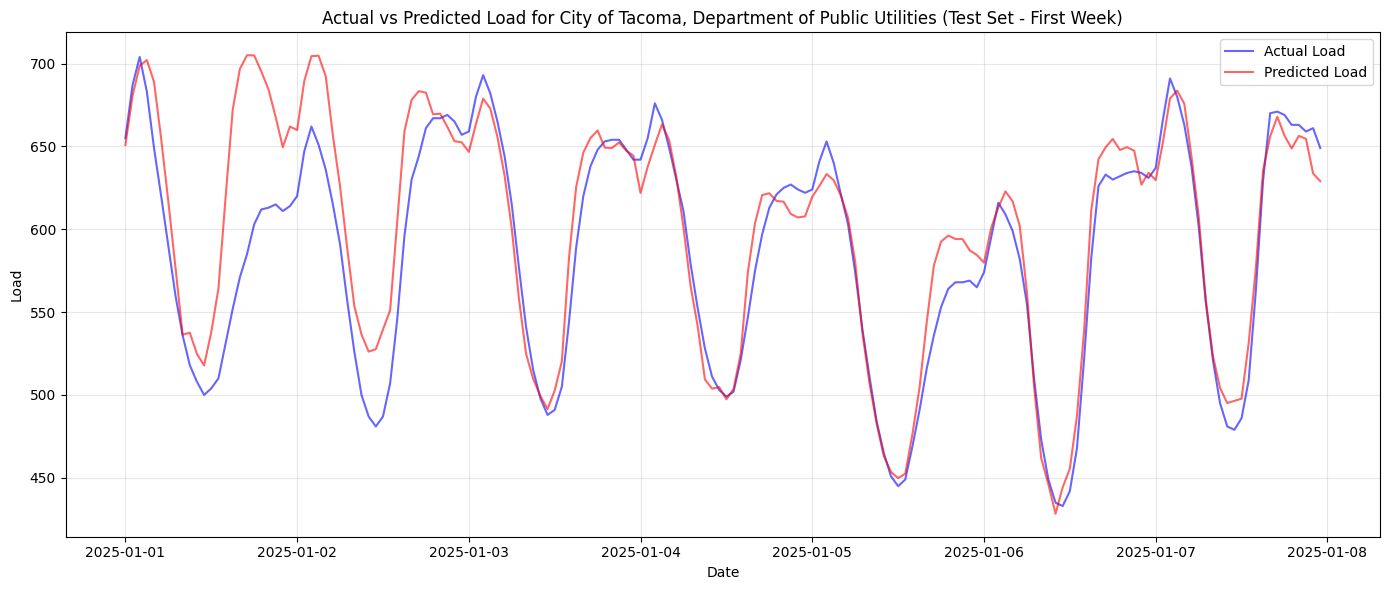

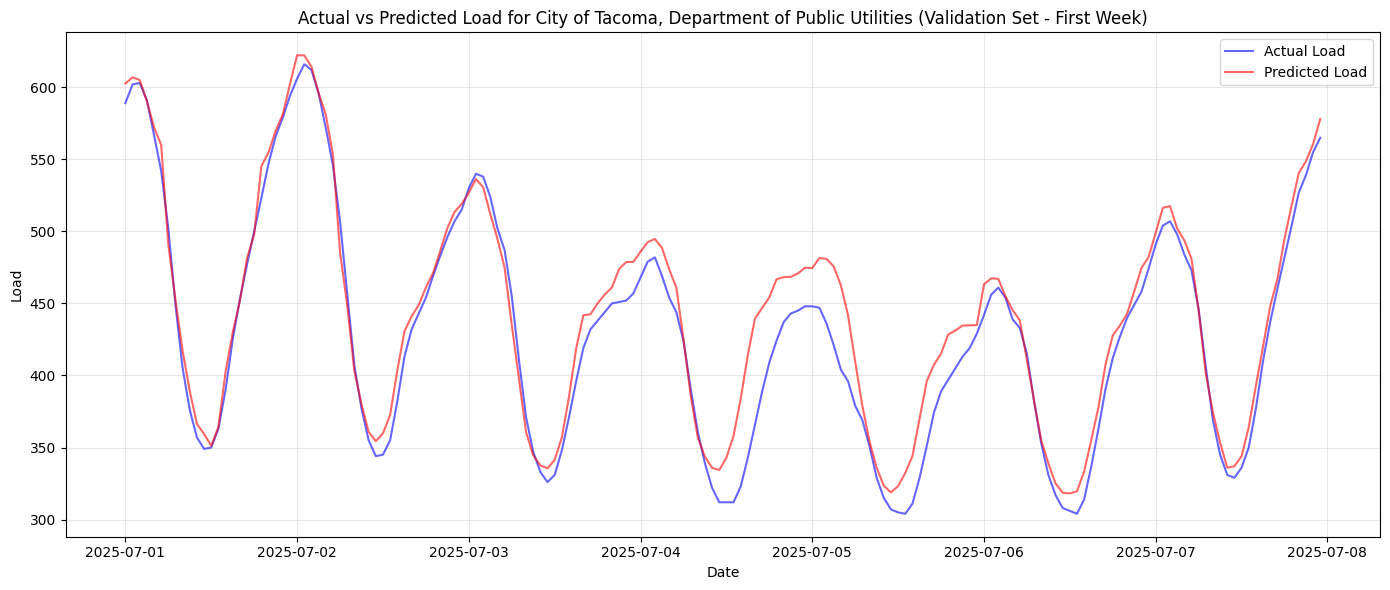


--- Processing Seattle City Light ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (28512, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9476
  Improved! New best Test R²: 0.9482

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 5, 'gamma': 0.1}
R-squared on training data: 0.9954
R-squared on test data: 0.9482
MAPE on training data: 0.99%
MAPE on test data: 3.60%
R-squared on validation data: 0.9157
MAPE on validation data: 3.69%


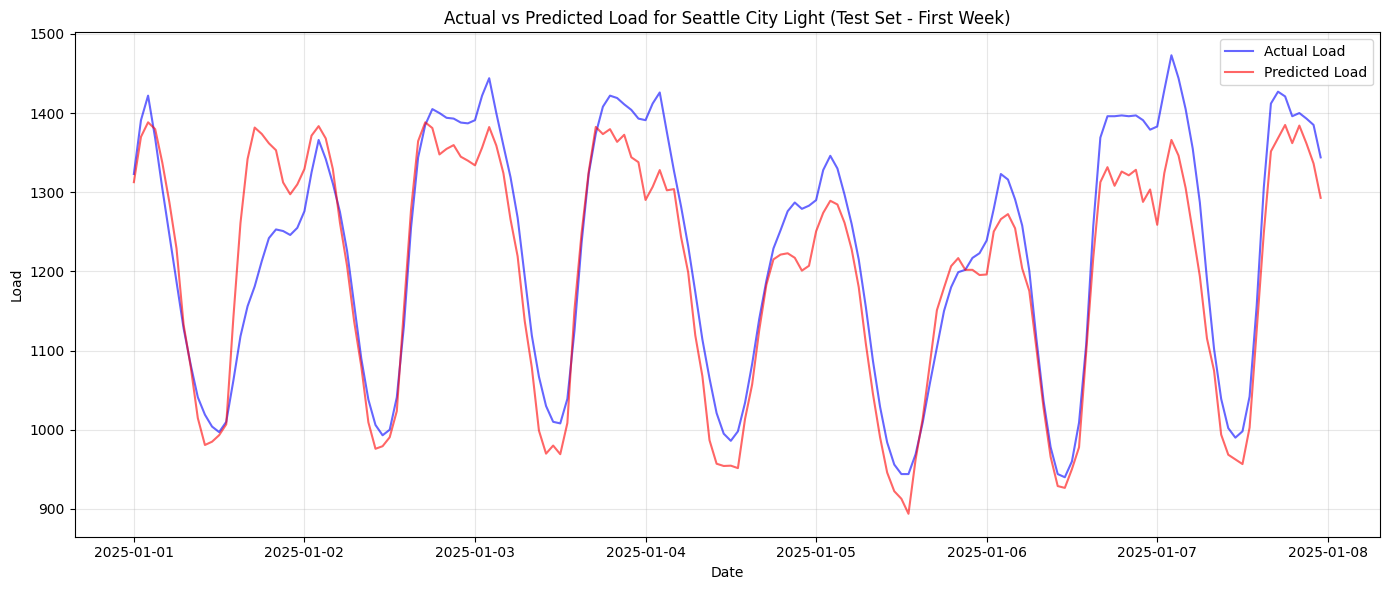

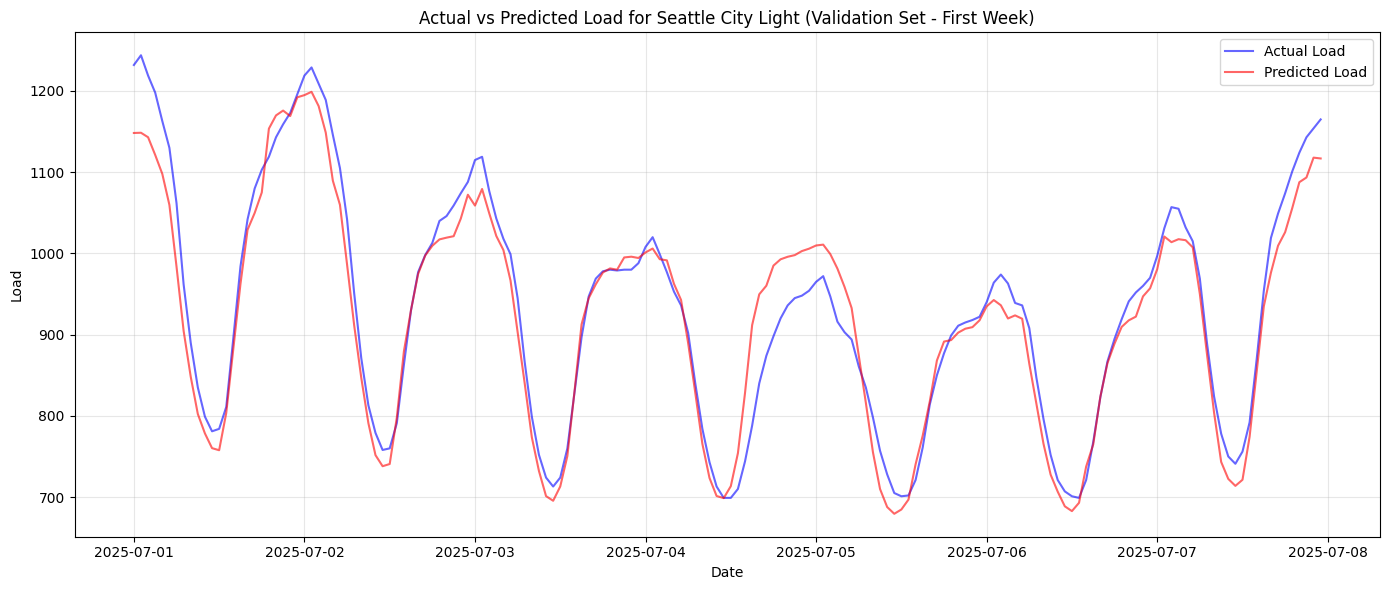


--- Processing Idaho Power Company ---
Data ranges from 2021-10-01 00:00:00 to 2025-09-23 06:00:00
Training data shape: (28512, 181), Test data shape: (4344, 181)
Validation data shape: (1991, 181)
Starting exponential hyperparameter search...
  Improved! New best Test R²: 0.9176
  Improved! New best Test R²: 0.9182
  Improved! New best Test R²: 0.9187
  Improved! New best Test R²: 0.9231

Training final model with best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.7, 'min_child_weight': 5, 'gamma': 0.1}
R-squared on training data: 0.9979
R-squared on test data: 0.9231
MAPE on training data: 0.82%
MAPE on test data: 3.96%
R-squared on validation data: 0.9232
MAPE on validation data: 4.18%


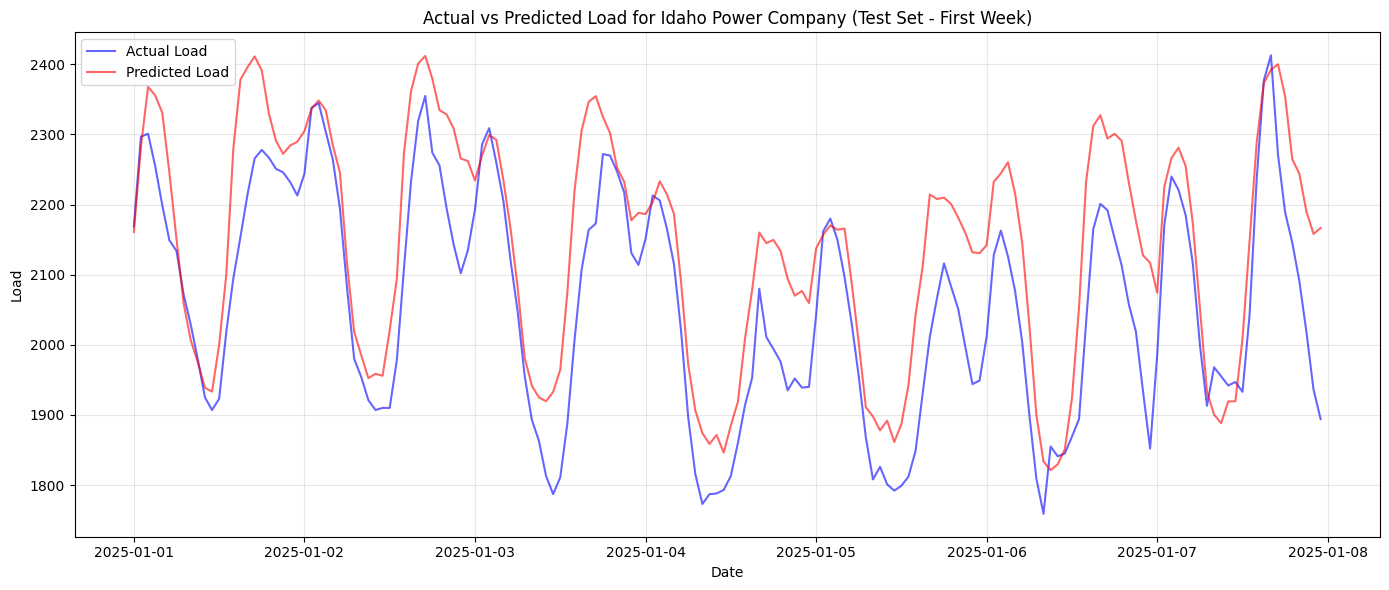

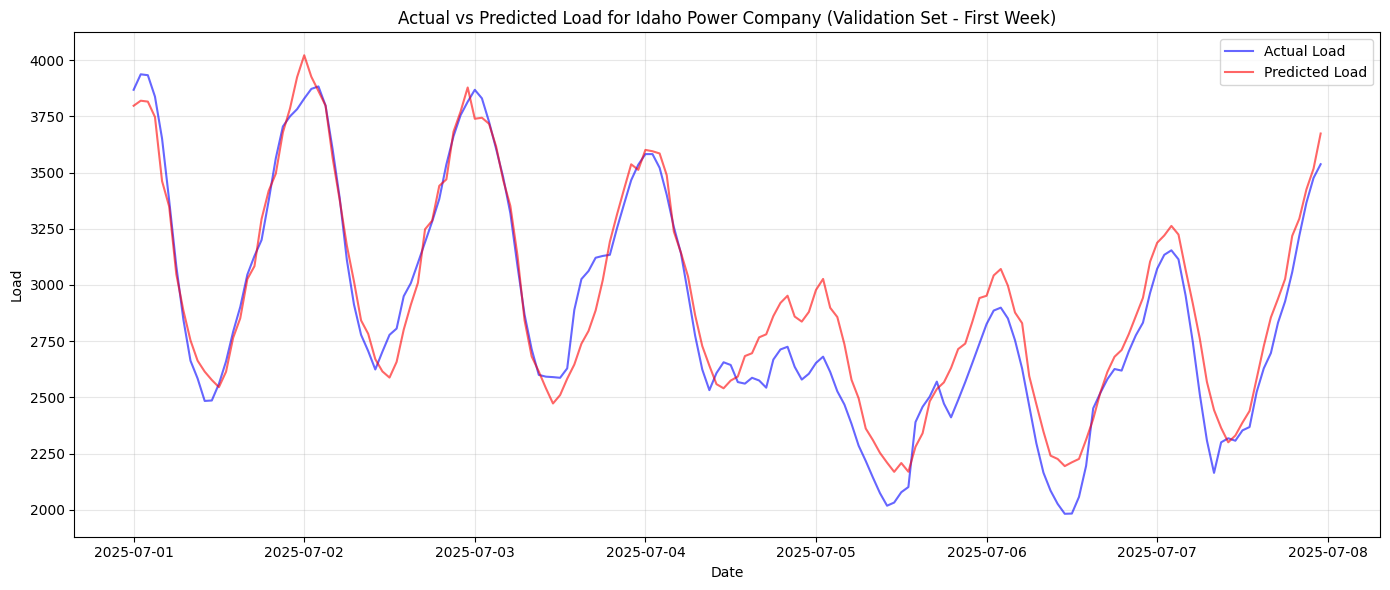


--- REGRESSION RESULTS FOR ALL ZONES ---
                                          Name  Train R²  Test R²  Validation R²  Train MAPE  Test MAPE  Validation MAPE                                                                                                                              Best Parameters
City of Tacoma, Department of Public Utilities  0.997980 0.973811       0.960854    0.744023   2.823147         2.790206  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_child_weight': 7, 'gamma': 0.1}
                            Avista Corporation  0.997889 0.969013       0.961583    0.741213   2.597553         3.202961  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 7, 'gamma': 0.1}
                      Puget Sound Energy, Inc.  0.997781 0.964454       0.955507    0.727190   2.985180         3.042911  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimato

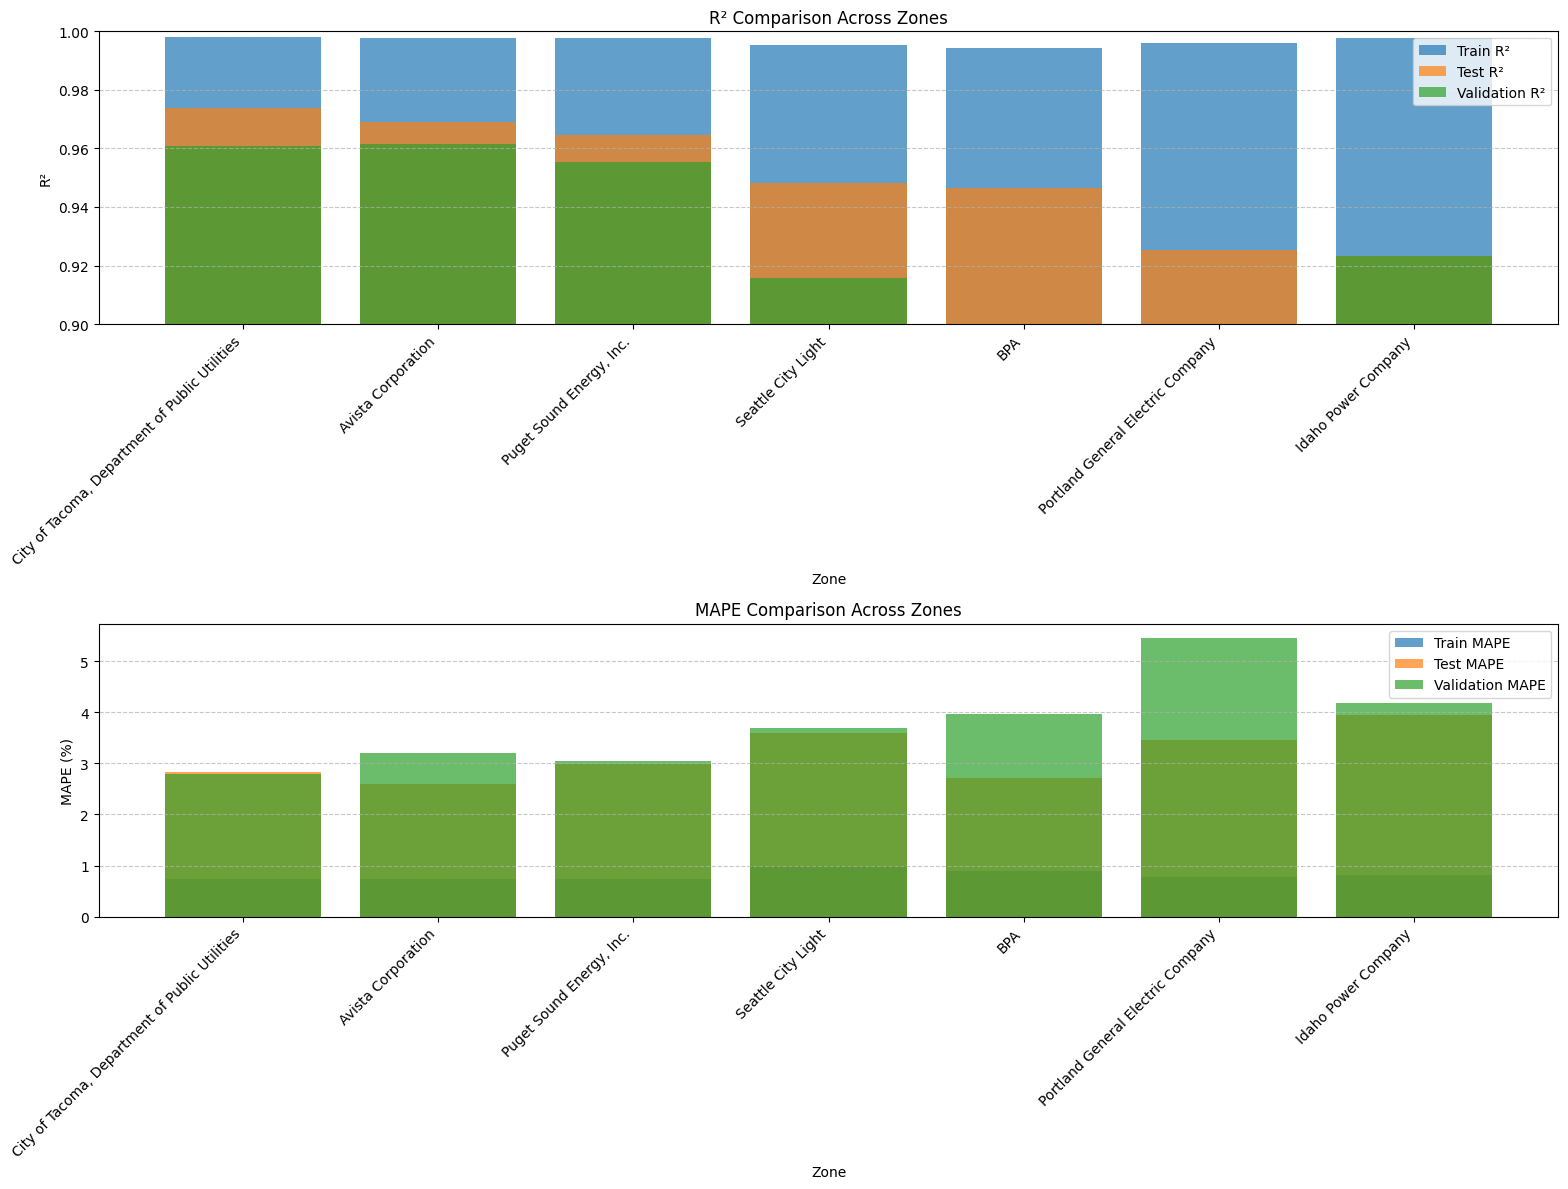

In [5]:
# Get all unique names from DFY
unique_names = [name for name in DFY['name'].unique() if name != 'AVRN']
print(f"Running regression for {len(unique_names)} zones: {unique_names}")

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Name', 'Train R²', 'Test R²', 'Validation R²', 'Train MAPE', 'Test MAPE', 'Validation MAPE', 'Best Parameters'])

# Loop through each name
for name in unique_names:
    print(f"\n--- Processing {name} ---")
    
    # Use the totalload function to calculate the total load
    start_date = pd.to_datetime('2021-10-01')
    end_date = DFY[DFY['name']==name].dropna()['datetime'].max()

    print(f"Data ranges from {start_date} to {end_date}")
    dfY = DFY[(DFY['name']==name) & (DFY['datetime'] >= start_date) & (DFY['datetime'] <= end_date)].dropna().rename(columns={"avgvalue":"load"}).drop(columns=['name'])
    DFX_filtered = DFX[(DFX['datetime'] >= start_date) & (DFX['datetime'] <= end_date)]
    
    # Check if we have enough data
    if len(dfY) < 100:
        print(f"Not enough data for {name}, skipping")
        continue
    
    # Drop nans from dfY['load']
    initial_len = len(dfY)
    dfY = dfY.dropna(subset=['load'])
    dropped_len = initial_len - len(dfY)
    if dropped_len > 0:
        print(f"Dropped {dropped_len} rows with NaN load values")
    
    # Get unique stations and columns to pivot
    stations = DFX_filtered['station_name'].unique()
    columns_to_pivot = DFX_filtered.columns.difference(['datetime', 'station_name'])

    # Create a list to store dataframes for each station
    station_dfs = []

    # For each station, create a dataframe with properly named columns
    for station in stations:
        # Filter data for this station
        station_data = DFX_filtered[DFX_filtered['station_name'] == station]
        
        # Set datetime as index
        station_data = station_data.set_index('datetime')
        
        # Drop the station_name column
        station_data = station_data.drop('station_name', axis=1)
        
        # Rename columns to include station name
        station_data = station_data.rename(columns={col: f"{col}_{station}" for col in station_data.columns})
        
        # Add to list
        station_dfs.append(station_data)

    # Concatenate all station dataframes horizontally
    dfX = pd.concat(station_dfs, axis=1).reset_index()
    
    # Extract date and time components
    dfX['year'] = dfX['datetime'].dt.year
    dfX['month'] = dfX['datetime'].dt.month
    dfX['date'] = dfX['datetime'].dt.day
    dfX['day'] = dfX['datetime'].dt.dayofweek
    dfX['time'] = dfX['datetime'].dt.hour
    
    # Merge X and Y
    df_XY = pd.merge(dfX, dfY, on='datetime')
    
    # Feature Engineering and Selection
    target = 'load'
    exclude_cols = [target, 'Predicted Load', 'set', 'datetime']
    features = [col for col in df_XY.columns if col not in exclude_cols]
    
    X = df_XY[features]
    y = df_XY[target]

    # Define train/test/validation split based on year and month
    train_mask = df_XY['year'] < 2025
    test_mask = (df_XY['year'] == 2025) & (df_XY['month'] <= 6)
    validation_mask = (df_XY['year'] == 2025) & (df_XY['month'] > 6)
    
    # Skip if we don't have both train and test data
    if not train_mask.any() or not test_mask.any():
        print(f"Not enough train/test data for {name}, skipping")
        continue

    # Detrend the target variable based on year
    X_year_train = df_XY.loc[train_mask, ['year']].astype(float)
    y_train_for_trend = y[train_mask]

    trend_model = LinearRegression()
    trend_model.fit(X_year_train, y_train_for_trend)
    #save the trend model
    trend_model_filename = f"../ML_results/{currentdate}/{name}_trend_model.pkl"
    joblib.dump(trend_model, trend_model_filename)
    # Calculate residuals for all data
    X_year = df_XY[['year']].astype(float)
    y_trend = trend_model.predict(X_year)
    y_residuals = y - y_trend

    # Split data
    X_train = X[train_mask]
    X_test = X[test_mask]
    X_validation = X[validation_mask] if validation_mask.any() else None
    
    y_train_residuals = y_residuals[train_mask]
    y_test_residuals = y_residuals[test_mask]
    y_validation_residuals = y_residuals[validation_mask] if validation_mask.any() else None
    
    y_train = y[train_mask]
    y_test = y[test_mask]
    y_validation = y[validation_mask] if validation_mask.any() else None
    
    y_train_trend = y_trend[train_mask]
    y_test_trend = y_trend[test_mask]
    y_validation_trend = y_trend[validation_mask] if validation_mask.any() else None

    print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
    if validation_mask.any():
        print(f"Validation data shape: {X_validation.shape}")
    else:
        print("No validation data available")

    # Handle missing values
    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_train.median())
    if X_validation is not None:
        X_validation = X_validation.fillna(X_train.median())

    # Define hyperparameter ranges for exponential search
    param_ranges = {
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4],
        'max_depth': [2, 3, 5, 7, 9, 12],
        'n_estimators': [50, 100, 200, 400, 800],
        'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.15, 0.25, 0.5, 0.7, 0.8, 0.9],
        'min_child_weight': [1, 3, 5, 7],
        'gamma': [0, 0.1, 0.2, 0.5]
    }
    
    # Start with median values for each parameter
    current_params = {
        'learning_rate': 0.01,
        'max_depth': 5,
        'n_estimators': 400,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'min_child_weight': 5,
        'gamma': 0.1
    }
    
    best_test_r2 = -float('inf')
    best_params = current_params.copy()
    best_train_r2 = None
    best_test_mape = None
    best_train_mape = None
    best_validation_r2 = None
    best_validation_mape = None
    best_train_pred = None
    best_test_pred = None
    best_validation_pred = None
    
    print("Starting exponential hyperparameter search...")
    
    # For each parameter, try adjusting to improve performance
    for param_name in ['learning_rate', 'max_depth', 'n_estimators', 'subsample', 'colsample_bytree', 'min_child_weight', 'gamma']:
        param_improved = True
        param_idx = param_ranges[param_name].index(current_params[param_name]) if current_params[param_name] in param_ranges[param_name] else 1
        
        while param_improved:
            param_improved = False
            
            # Try increasing the parameter if not at max
            if param_idx < len(param_ranges[param_name]) - 1:
                higher_param = param_ranges[param_name][param_idx + 1]
                test_params = current_params.copy()
                test_params[param_name] = higher_param
                
                # Train and evaluate with the higher parameter
                model = xgb.XGBRegressor(**test_params)
                model.fit(X_train, y_train_residuals)
                
                # Make predictions
                y_test_residuals_pred = model.predict(X_test)
                y_test_pred = y_test_residuals_pred + y_test_trend
                
                # Calculate test R2
                test_r2 = r2_score(y_test, y_test_pred)
                
                # If performance improved, update parameters and continue search
                if test_r2 > best_test_r2:
                    best_test_r2 = test_r2
                    best_params = test_params.copy()
                    current_params = test_params.copy()
                    param_idx += 1
                    param_improved = True
                    print(f"  Improved! New best Test R²: {best_test_r2:.4f}")
            
            # If increasing didn't improve, try decreasing if not at min
            if not param_improved and param_idx > 0:
                lower_param = param_ranges[param_name][param_idx - 1]
                test_params = current_params.copy()
                test_params[param_name] = lower_param
                
                # Train and evaluate with the lower parameter
                model = xgb.XGBRegressor(**test_params)
                model.fit(X_train, y_train_residuals)
                
                # Make predictions
                y_test_residuals_pred = model.predict(X_test)
                y_test_pred = y_test_residuals_pred + y_test_trend
                
                # Calculate test R2
                test_r2 = r2_score(y_test, y_test_pred)
                
                # If performance improved, update parameters and continue search
                if test_r2 > best_test_r2:
                    best_test_r2 = test_r2
                    best_params = test_params.copy()
                    current_params = test_params.copy()
                    param_idx -= 1
                    param_improved = True
                    print(f"  Improved! New best Test R²: {best_test_r2:.4f}")
    
    # Final evaluation with the best parameters
    print("\nTraining final model with best parameters:")
    print(best_params)
    
    final_model = xgb.XGBRegressor(**best_params)
    final_model.fit(X_train, y_train_residuals)

    #save the model
    model_filename = f"../ML_results/{currentdate}/{name}_xgb_model.pkl"
    joblib.dump(final_model, model_filename)
    # Make predictions on all data sets
    y_train_residuals_pred = final_model.predict(X_train)
    y_test_residuals_pred = final_model.predict(X_test)
    
    # Add trend back
    y_train_pred = y_train_residuals_pred + y_train_trend
    y_test_pred = y_test_residuals_pred + y_test_trend
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    print(f"R-squared on training data: {train_r2:.4f}")
    print(f"R-squared on test data: {test_r2:.4f}")
    print(f"MAPE on training data: {train_mape:.2f}%")
    print(f"MAPE on test data: {test_mape:.2f}%")
    
    # Evaluate on validation set if available
    validation_r2 = None
    validation_mape = None
    validation_pred = None
    
    if validation_mask.any():
        y_validation_residuals_pred = final_model.predict(X_validation)
        y_validation_pred = y_validation_residuals_pred + y_validation_trend
        validation_r2 = r2_score(y_validation, y_validation_pred)
        validation_mape = np.mean(np.abs((y_validation - y_validation_pred) / y_validation)) * 100
        validation_pred = y_validation_pred
        print(f"R-squared on validation data: {validation_r2:.4f}")
        print(f"MAPE on validation data: {validation_mape:.2f}%")
    
    # Add results to DataFrame
    results_df = results_df._append({
        'Name': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Validation R²': validation_r2,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape,
        'Validation MAPE': validation_mape,
        'Best Parameters': str(best_params)
    }, ignore_index=True)
    
    # Optional: Plot actual vs predicted for the best model
    # Plot actual vs predicted for the best model
    # Plot only the first 168 datapoints (7 days) to better visualize the patterns
    plt.figure(figsize=(14, 6))
    
    # Create a date range for the test data
    test_dates = df_XY.loc[test_mask, 'datetime']
    
    # Get first 168 hours (7 days) of test data
    plot_limit = min(168, len(test_dates))
    
    # Plot the test data predictions
    plt.plot(test_dates[:plot_limit], y_test[:plot_limit], 'b-', alpha=0.6, label='Actual Load')
    plt.plot(test_dates[:plot_limit], y_test_pred[:plot_limit], 'r-', alpha=0.6, label='Predicted Load')
    
    # Add labels and title
    plt.title(f'Actual vs Predicted Load for {name} (Test Set - First Week)')
    plt.xlabel('Date')
    plt.ylabel('Load')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # If validation data exists, plot it too
    if validation_mask.any():
        plt.figure(figsize=(14, 6))
        validation_dates = df_XY.loc[validation_mask, 'datetime']
        
        # Get first 168 hours (7 days) of validation data
        val_plot_limit = min(168, len(validation_dates))
        
        plt.plot(validation_dates[:val_plot_limit], y_validation[:val_plot_limit], 'b-', alpha=0.6, label='Actual Load')
        plt.plot(validation_dates[:val_plot_limit], y_validation_pred[:val_plot_limit], 'r-', alpha=0.6, label='Predicted Load')
        plt.title(f'Actual vs Predicted Load for {name} (Validation Set - First Week)')
        plt.xlabel('Date')
        plt.ylabel('Load')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Sort results by Test R² (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

# Display the results table
print("\n--- REGRESSION RESULTS FOR ALL ZONES ---")
print(results_df.to_string(index=False))

# Plot the results
plt.figure(figsize=(16, 12))

# Plot Train vs Test vs Validation R²
plt.subplot(2, 1, 1)
plt.bar(results_df['Name'], results_df['Train R²'], alpha=0.7, label='Train R²')
plt.bar(results_df['Name'], results_df['Test R²'], alpha=0.7, label='Test R²')
if 'Validation R²' in results_df.columns and not results_df['Validation R²'].isna().all():
    plt.bar(results_df['Name'], results_df['Validation R²'], alpha=0.7, label='Validation R²')
plt.xlabel('Zone')
plt.ylabel('R²')
plt.ylim(0.9,1.0)
plt.title('R² Comparison Across Zones')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Train vs Test vs Validation MAPE
plt.subplot(2, 1, 2)
plt.bar(results_df['Name'], results_df['Train MAPE'], alpha=0.7, label='Train MAPE')
plt.bar(results_df['Name'], results_df['Test MAPE'], alpha=0.7, label='Test MAPE')
if 'Validation MAPE' in results_df.columns and not results_df['Validation MAPE'].isna().all():
    plt.bar(results_df['Name'], results_df['Validation MAPE'], alpha=0.7, label='Validation MAPE')
plt.xlabel('Zone')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison Across Zones')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#store the best hyperparameters for each zone in a csv file
results_df.to_csv(f"../ML_results/{currentdate}/LoadALLZonesTrainTestVal_scores_hyperparams.csv", index=False)

In [6]:
features

['cloudCover_Billings',
 'dewpoint_Billings',
 'temperature_Billings',
 'windDirection_Billings',
 'windSpeed_Billings',
 '24hrMaxTempDelt_Billings',
 '1WMaxTempDelt_Billings',
 '24hrTempCDD_Billings',
 '24hrTempHDD_Billings',
 '1WTempCDD_Billings',
 '1WTempHDD_Billings',
 'cloudCover_Boise',
 'dewpoint_Boise',
 'temperature_Boise',
 'windDirection_Boise',
 'windSpeed_Boise',
 '24hrMaxTempDelt_Boise',
 '1WMaxTempDelt_Boise',
 '24hrTempCDD_Boise',
 '24hrTempHDD_Boise',
 '1WTempCDD_Boise',
 '1WTempHDD_Boise',
 'cloudCover_Eugene',
 'dewpoint_Eugene',
 'temperature_Eugene',
 'windDirection_Eugene',
 'windSpeed_Eugene',
 '24hrMaxTempDelt_Eugene',
 '1WMaxTempDelt_Eugene',
 '24hrTempCDD_Eugene',
 '24hrTempHDD_Eugene',
 '1WTempCDD_Eugene',
 '1WTempHDD_Eugene',
 'cloudCover_Great Falls',
 'dewpoint_Great Falls',
 'temperature_Great Falls',
 'windDirection_Great Falls',
 'windSpeed_Great Falls',
 '24hrMaxTempDelt_Great Falls',
 '1WMaxTempDelt_Great Falls',
 '24hrTempCDD_Great Falls',
 '24hrTemp

Running regression for 9 zones: ['Puget Sound Energy, Inc.' 'BPA' 'Avista Corporation'
 'Seattle City Light' 'PACW-TAC' 'Idaho Power Company' 'AVRN'
 'Portland General Electric Company'
 'City of Tacoma, Department of Public Utilities']

--- Processing Puget Sound Energy, Inc. ---
Data ranges from 2021-10-01 00:00:00 to 2025-08-22 05:00:00


C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for Puget Sound Energy, Inc.:
                  Feature  Importance                     Zone
         24hrTempHDD_NWPP    0.297371 Puget Sound Energy, Inc.
       24hrTempHDD_Yakima    0.137942 Puget Sound Energy, Inc.
         temperature_NWPP    0.053738 Puget Sound Energy, Inc.
         1WTempHDD_Yakima    0.041128 Puget Sound Energy, Inc.
                     time    0.039068 Puget Sound Energy, Inc.
      24hrTempHDD_Seattle    0.037384 Puget Sound Energy, Inc.
     24hrMaxTempDelt_NWPP    0.032265 Puget Sound Energy, Inc.
           1WTempHDD_Reno    0.030914 Puget Sound Energy, Inc.
           1WTempCDD_Reno    0.029604 Puget Sound Energy, Inc.
    temperature_Vancouver    0.024390 Puget Sound Energy, Inc.
      temperature_Seattle    0.023538 Puget Sound Energy, Inc.
  24hrMaxTempDelt_Spokane    0.015457 Puget Sound Energy, Inc.
    24hrTempHDD_Vancouver    0.013345 Puget Sound Energy, Inc.
         1WTempCDD_Yakima    0.010995 Puget Sound Energy, Inc.
      tem

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for BPA:
                       Feature  Importance Zone
              24hrTempHDD_NWPP    0.219951  BPA
          24hrTempHDD_Portland    0.161852  BPA
              temperature_NWPP    0.048117  BPA
                          time    0.043563  BPA
           24hrTempHDD_Seattle    0.037341  BPA
           temperature_Spokane    0.036721  BPA
          24hrMaxTempDelt_NWPP    0.034812  BPA
              1WTempHDD_Yakima    0.032871  BPA
       24hrMaxTempDelt_Spokane    0.030578  BPA
            1WMaxTempDelt_Reno    0.030242  BPA
           1WTempHDD_Vancouver    0.028319  BPA
          temperature_Portland    0.022959  BPA
           temperature_Seattle    0.022308  BPA
                           day    0.017440  BPA
                          year    0.014283  BPA
                1WTempCDD_Reno    0.014115  BPA
       1WMaxTempDelt_Pendleton    0.011410  BPA
            24hrTempCDD_Yakima    0.009953  BPA
              24hrTempCDD_NWPP    0.008623  BPA
               

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for Avista Corporation:
                       Feature  Importance               Zone
     24hrMaxTempDelt_Pendleton    0.166409 Avista Corporation
         24hrMaxTempDelt_Boise    0.102243 Avista Corporation
              24hrTempHDD_NWPP    0.101713 Avista Corporation
           1WMaxTempDelt_Boise    0.067829 Avista Corporation
           temperature_Spokane    0.052357 Avista Corporation
                          time    0.051837 Avista Corporation
         24hrTempHDD_Vancouver    0.035262 Avista Corporation
           24hrTempHDD_Spokane    0.034570 Avista Corporation
          24hrTempHDD_Portland    0.029234 Avista Corporation
              temperature_NWPP    0.026589 Avista Corporation
              1WTempHDD_Yakima    0.025483 Avista Corporation
  1WMaxTempDelt_Salt Lake City    0.022294 Avista Corporation
       1WMaxTempDelt_Vancouver    0.019208 Avista Corporation
24hrMaxTempDelt_Salt Lake City    0.018928 Avista Corporation
       24hrMaxTempDelt_Spokane

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for Seattle City Light:
                  Feature  Importance               Zone
         24hrTempHDD_NWPP    0.221260 Seattle City Light
     24hrTempHDD_Portland    0.097677 Seattle City Light
           1WTempHDD_NWPP    0.057138 Seattle City Light
           1WTempCDD_Reno    0.056177 Seattle City Light
                     time    0.052424 Seattle City Light
       24hrTempHDD_Yakima    0.048579 Seattle City Light
           1WTempHDD_Reno    0.044164 Seattle City Light
      24hrTempHDD_Seattle    0.035968 Seattle City Light
     24hrMaxTempDelt_NWPP    0.031070 Seattle City Light
      temperature_Seattle    0.029148 Seattle City Light
         temperature_NWPP    0.027668 Seattle City Light
        1WTempCDD_Medford    0.023704 Seattle City Light
     1WMaxTempDelt_Yakima    0.022110 Seattle City Light
         1WTempHDD_Yakima    0.018005 Seattle City Light
                      day    0.017658 Seattle City Light
    1WMaxTempDelt_Spokane    0.014824 Seattle Ci

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for PACW-TAC:
                       Feature  Importance     Zone
     24hrMaxTempDelt_Pendleton    0.200602 PACW-TAC
              24hrTempHDD_NWPP    0.113849 PACW-TAC
              temperature_NWPP    0.071105 PACW-TAC
                          time    0.049958 PACW-TAC
           temperature_Medford    0.038229 PACW-TAC
          24hrTempHDD_Portland    0.036332 PACW-TAC
           1WMaxTempDelt_Boise    0.035189 PACW-TAC
           temperature_Spokane    0.034299 PACW-TAC
         24hrMaxTempDelt_Boise    0.032886 PACW-TAC
          temperature_Portland    0.029041 PACW-TAC
      24hrMaxTempDelt_Portland    0.024262 PACW-TAC
         1WMaxTempDelt_Medford    0.023819 PACW-TAC
                           day    0.023395 PACW-TAC
  1WMaxTempDelt_Salt Lake City    0.021807 PACW-TAC
            24hrTempHDD_Eugene    0.013096 PACW-TAC
              1WTempHDD_Yakima    0.011596 PACW-TAC
            temperature_Yakima    0.010189 PACW-TAC
          24hrMaxTempDelt_NWPP    

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for Idaho Power Company:
                     Feature  Importance                Zone
           temperature_Boise    0.170166 Idaho Power Company
  temperature_Salt Lake City    0.152500 Idaho Power Company
            temperature_NWPP    0.132852 Idaho Power Company
    1WTempCDD_Salt Lake City    0.048603 Idaho Power Company
         temperature_Spokane    0.034778 Idaho Power Company
  24hrTempCDD_Salt Lake City    0.030547 Idaho Power Company
           24hrTempHDD_Boise    0.029215 Idaho Power Company
             1WTempHDD_Boise    0.027656 Idaho Power Company
  24hrTempHDD_Salt Lake City    0.024497 Idaho Power Company
           24hrTempCDD_Boise    0.022331 Idaho Power Company
            24hrTempHDD_Reno    0.021329 Idaho Power Company
              1WTempCDD_Reno    0.019702 Idaho Power Company
            24hrTempHDD_NWPP    0.015392 Idaho Power Company
                        time    0.014586 Idaho Power Company
       temperature_Pendleton    0.013092 Ida

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


Top 45 features for Portland General Electric Company:
                     Feature  Importance                              Zone
    24hrMaxTempDelt_Portland    0.213074 Portland General Electric Company
        24hrMaxTempDelt_NWPP    0.080768 Portland General Electric Company
            24hrTempHDD_NWPP    0.079038 Portland General Electric Company
                        time    0.075083 Portland General Electric Company
        temperature_Portland    0.067888 Portland General Electric Company
            temperature_NWPP    0.059788 Portland General Electric Company
   24hrMaxTempDelt_Pendleton    0.030951 Portland General Electric Company
        24hrTempHDD_Portland    0.030910 Portland General Electric Company
         1WMaxTempDelt_Boise    0.026769 Portland General Electric Company
                         day    0.024904 Portland General Electric Company
            1WTempHDD_Yakima    0.018627 Portland General Electric Company
         24hrTempHDD_Spokane    0.010027 Port

C:\Users\kumar\AppData\Local\Temp\ipykernel_15756\3950613903.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Zone'] = name


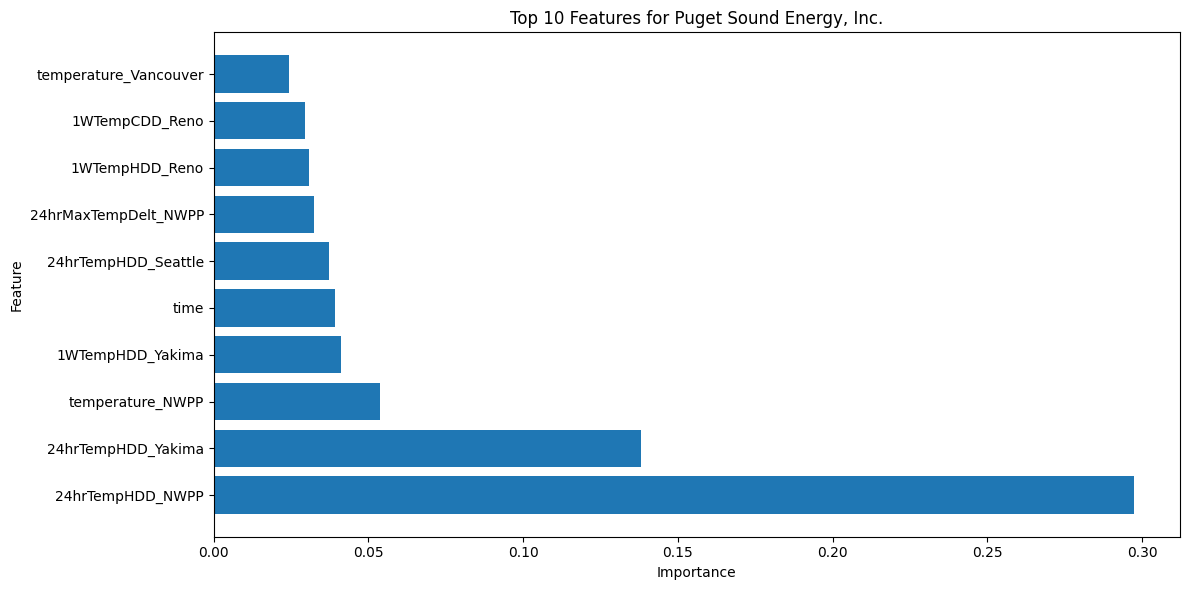

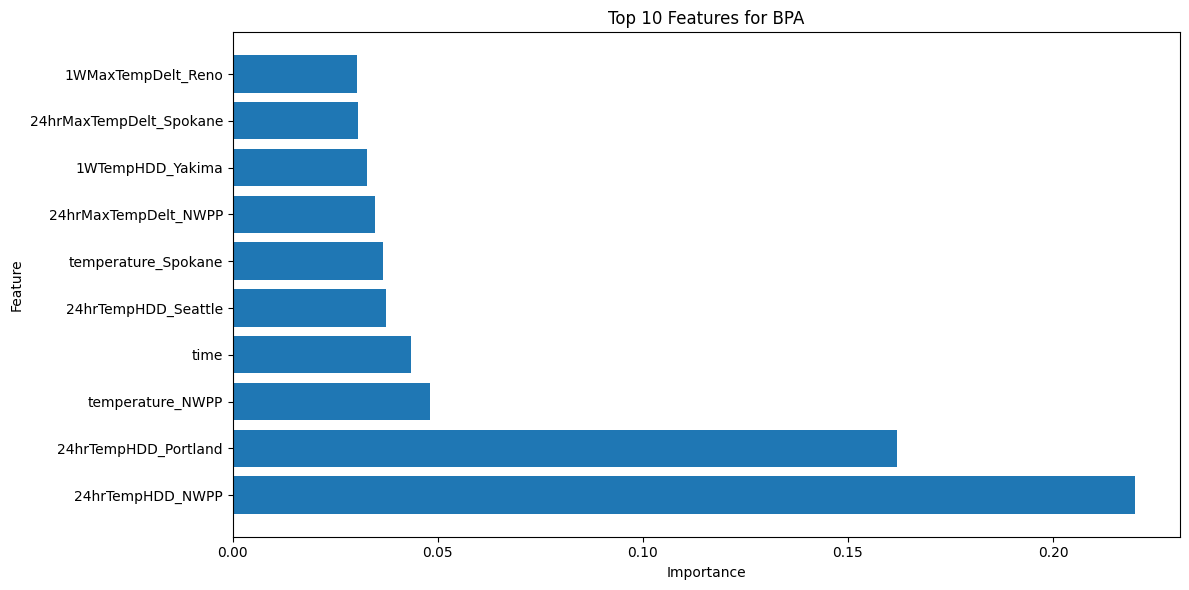

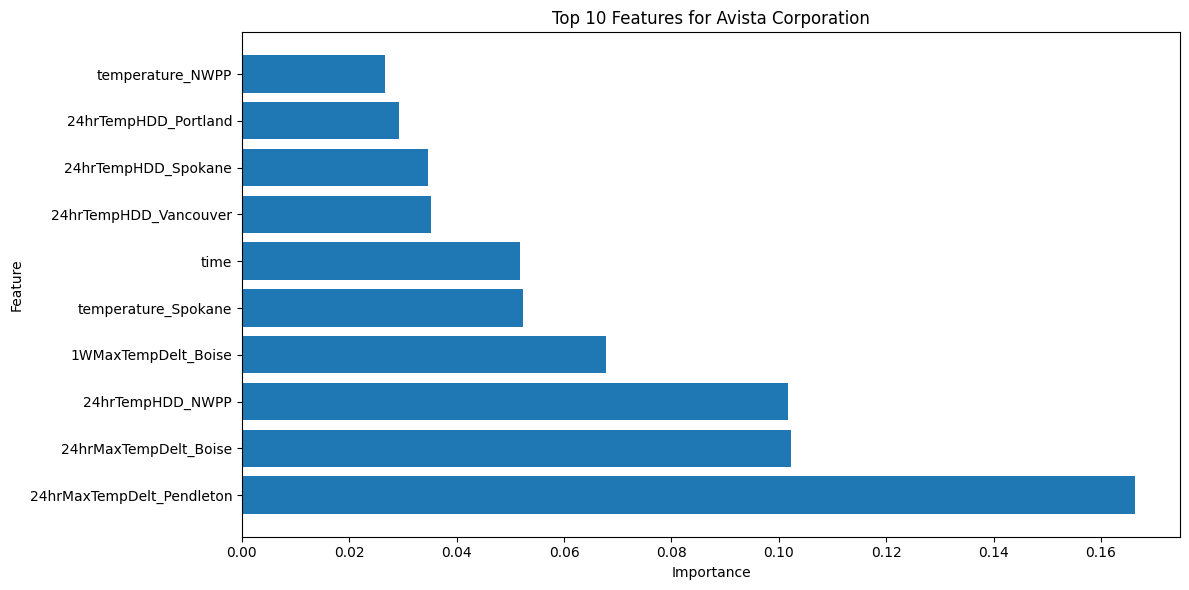

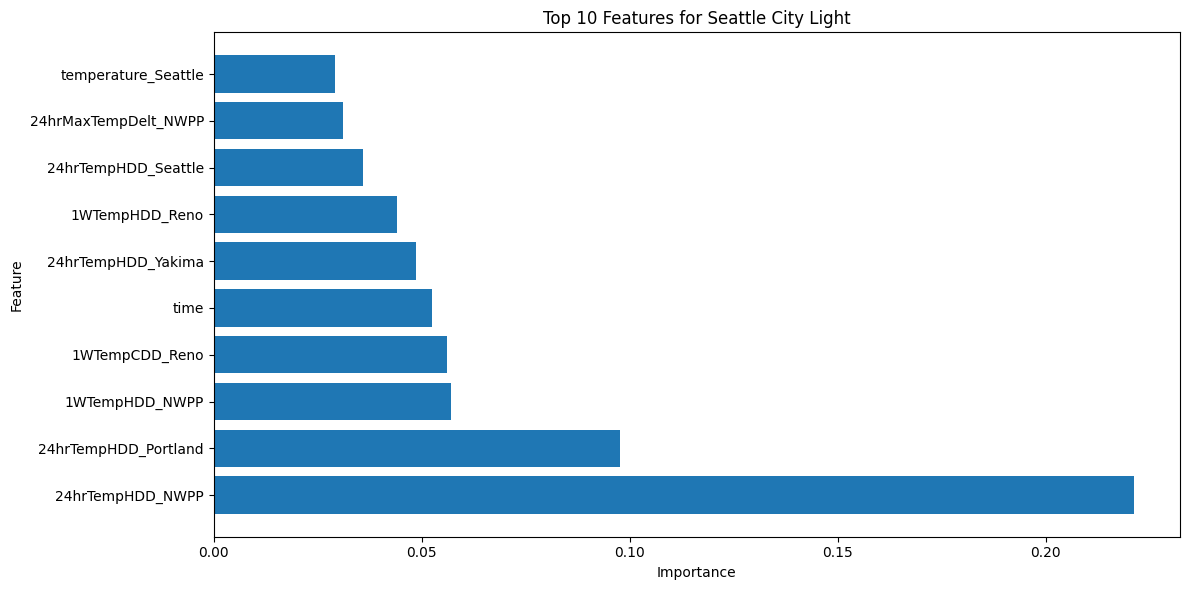

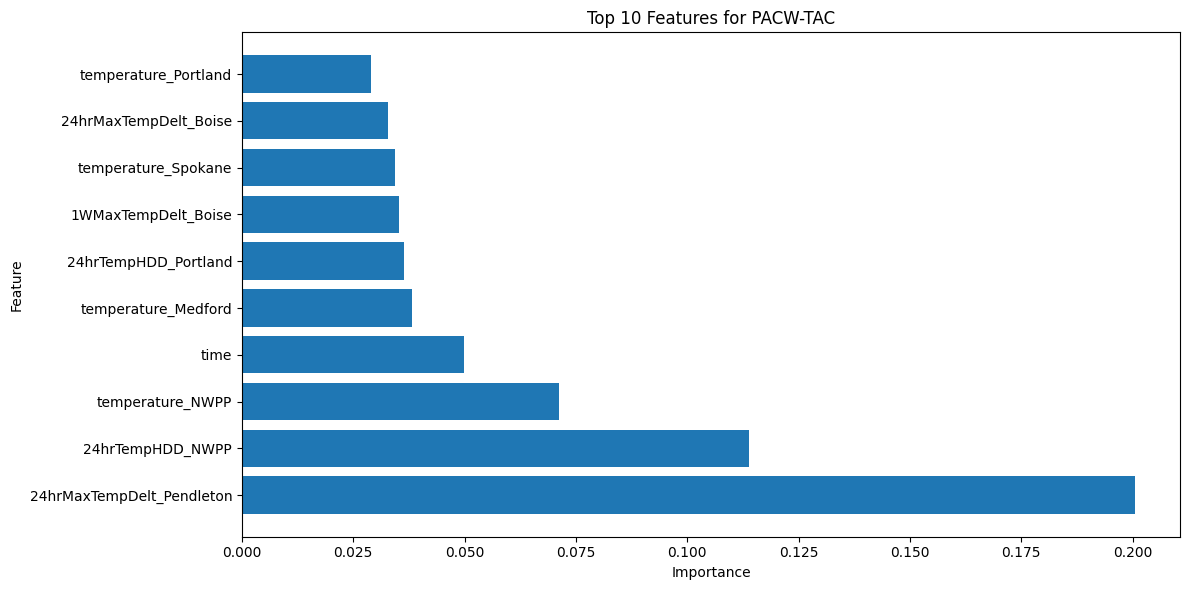

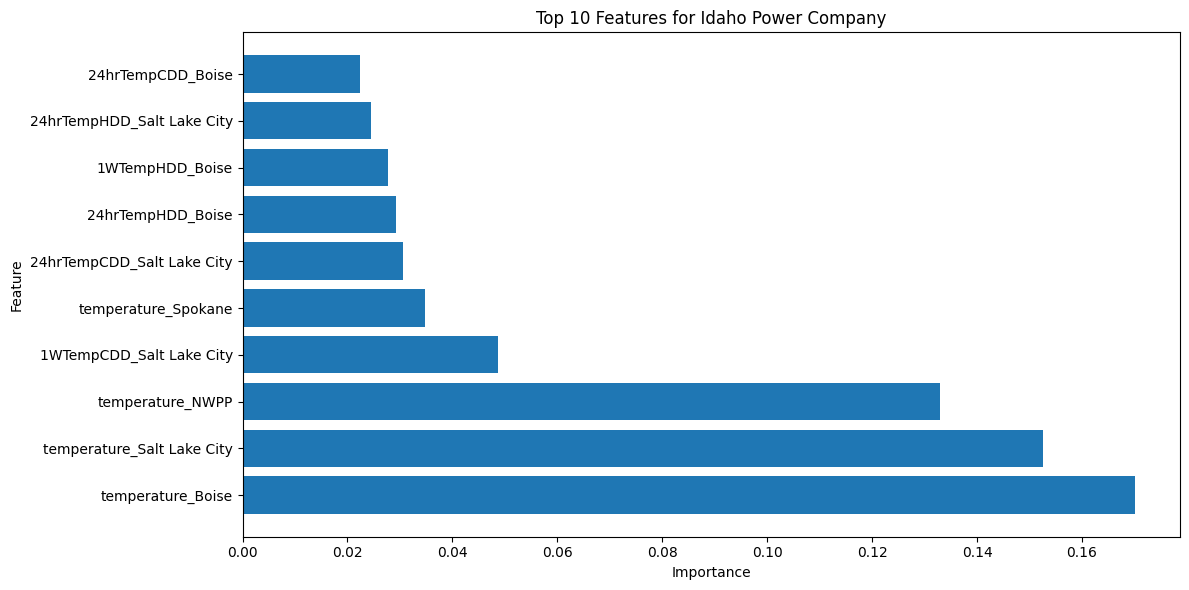

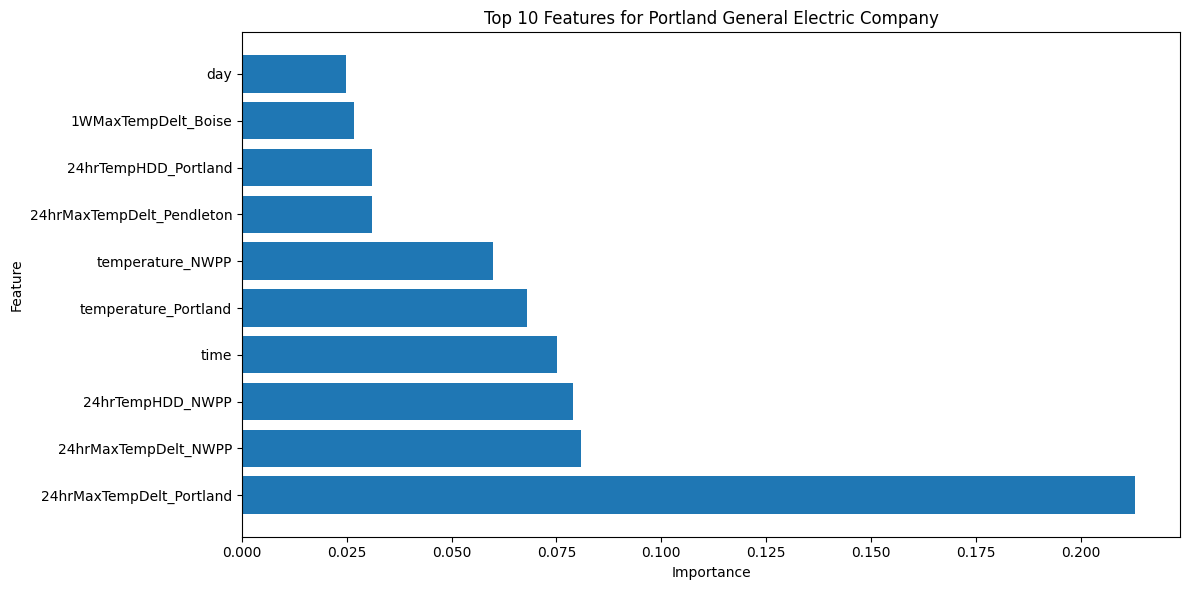

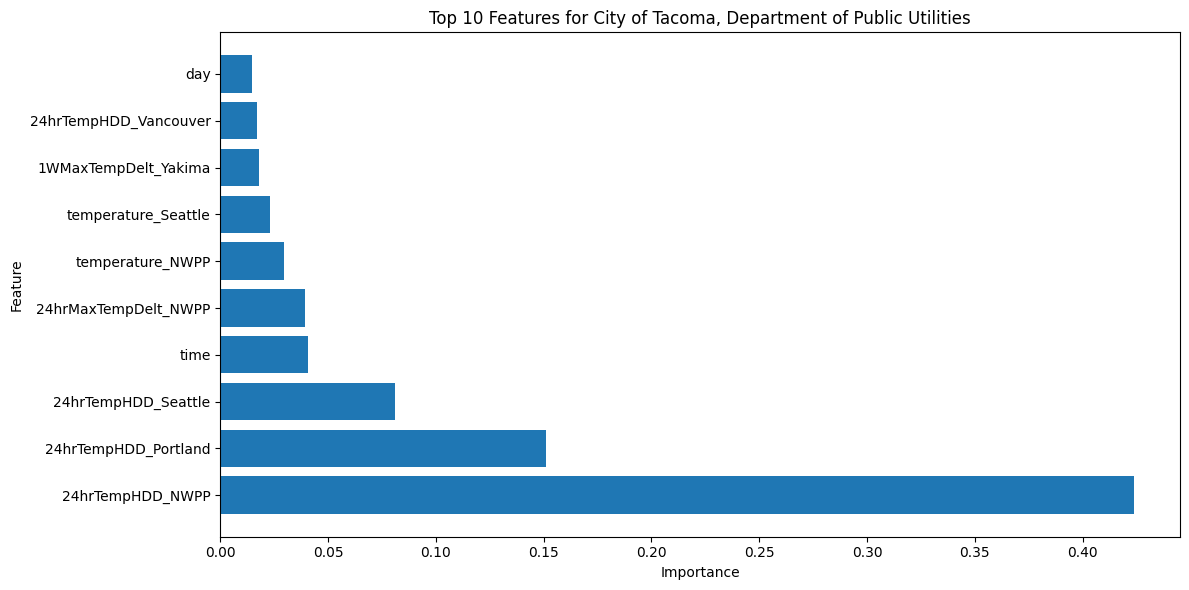

In [5]:
# Load the best hyperparameters from the saved CSV
best_params_df = pd.read_csv(modelsavename)

# Get all unique names from DFY
unique_names = DFY['name'].unique()
print(f"Running regression for {len(unique_names)} zones: {unique_names}")

# Create a DataFrame to store feature importance results
feature_importance_df = pd.DataFrame()

# Loop through each name
for name in unique_names:
    print(f"\n--- Processing {name} ---")
    
    # Get best parameters for this zone
    zone_params = best_params_df[best_params_df['Name'] == name]
    if zone_params.empty:
        print(f"No hyperparameters found for {name}, skipping")
        continue
    
    # Parse the best parameters string
    best_params_str = zone_params['Best Parameters'].values[0]
    # Convert string representation of dict to actual dict
    import ast
    best_params = ast.literal_eval(best_params_str)
    
    # Use the totalload function to calculate the total load
    start_date = pd.to_datetime('2021-10-01')
    end_date = DFY[DFY['name']==name].dropna()['datetime'].max()

    print(f"Data ranges from {start_date} to {end_date}")
    dfY = DFY[(DFY['name']==name) & (DFY['datetime'] >= start_date) & (DFY['datetime'] <= end_date)].dropna().rename(columns={"avgvalue":"load"}).drop(columns=['name'])
    DFX_filtered = DFX[(DFX['datetime'] >= start_date) & (DFX['datetime'] <= end_date)]
    
    # Check if we have enough data
    if len(dfY) < 100:
        print(f"Not enough data for {name}, skipping")
        continue
    
    # Drop nans from dfY['load']
    initial_len = len(dfY)
    dfY = dfY.dropna(subset=['load'])
    dropped_len = initial_len - len(dfY)
    if dropped_len > 0:
        print(f"Dropped {dropped_len} rows with NaN load values")
    
    # Get unique stations and columns to pivot (reuse the existing code)
    stations = DFX_filtered['station_name'].unique()
    columns_to_pivot = DFX_filtered.columns.difference(['datetime', 'station_name'])

    # Create a list to store dataframes for each station
    station_dfs = []

    # For each station, create a dataframe with properly named columns
    for station in stations:
        # Filter data for this station
        station_data = DFX_filtered[DFX_filtered['station_name'] == station]
        
        # Set datetime as index
        station_data = station_data.set_index('datetime')
        
        # Drop the station_name column
        station_data = station_data.drop('station_name', axis=1)
        
        # Rename columns to include station name
        station_data = station_data.rename(columns={col: f"{col}_{station}" for col in station_data.columns})
        
        # Add to list
        station_dfs.append(station_data)

    # Concatenate all station dataframes horizontally
    dfX = pd.concat(station_dfs, axis=1).reset_index()
    
    # Extract date and time components
    dfX['year'] = dfX['datetime'].dt.year
    dfX['month'] = dfX['datetime'].dt.month
    dfX['date'] = dfX['datetime'].dt.day
    dfX['day'] = dfX['datetime'].dt.dayofweek
    dfX['time'] = dfX['datetime'].dt.hour
    
    # Merge X and Y
    df_XY = pd.merge(dfX, dfY, on='datetime')
    
    # Feature Engineering and Selection
    target = 'load'
    exclude_cols = [target, 'Predicted Load', 'set', 'datetime']
    features = [col for col in df_XY.columns if col not in exclude_cols]
    
    X = df_XY[features]
    y = df_XY[target]

    # Define train/test/validation split based on year and month
    train_mask = df_XY['year'] < 2025
    test_mask = (df_XY['year'] == 2025) & (df_XY['month'] <= 6)
    validation_mask = (df_XY['year'] == 2025) & (df_XY['month'] > 6)
    
    # Skip if we don't have both train and test data
    if not train_mask.any() or not test_mask.any():
        print(f"Not enough train/test data for {name}, skipping")
        continue

    # Detrend the target variable based on year
    X_year_train = df_XY.loc[train_mask, ['year']].astype(float)
    y_train_for_trend = y[train_mask]

    trend_model = LinearRegression()
    trend_model.fit(X_year_train, y_train_for_trend)
    
    # Calculate residuals for all data
    X_year = df_XY[['year']].astype(float)
    y_trend = trend_model.predict(X_year)
    y_residuals = y - y_trend

    # Split data
    X_train = X[train_mask]
    X_test = X[test_mask]
    X_validation = X[validation_mask] if validation_mask.any() else None
    
    y_train_residuals = y_residuals[train_mask]
    y_test_residuals = y_residuals[test_mask]
    
    # Handle missing values
    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_train.median())
    if X_validation is not None:
        X_validation = X_validation.fillna(X_train.median())

    # Train final model with best parameters
    final_model = xgb.XGBRegressor(**best_params)
    final_model.fit(X_train, y_train_residuals)
    
    # Get feature importance
    feature_importance = final_model.feature_importances_
    
    # Create a DataFrame with feature names and their importance scores
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    })
    
    # Sort by importance in descending order
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    # Calculate the 25% threshold for feature selection
    top_features_count = int(len(importance_df) * 0.25)
    top_features = importance_df.head(top_features_count)
    
    # Add zone name to the DataFrame
    top_features['Zone'] = name
    
    # Append to the main feature importance DataFrame
    feature_importance_df = pd.concat([feature_importance_df, top_features])
    
    print(f"Top {top_features_count} features for {name}:")
    print(top_features.to_string(index=False))

# Save all feature importance results
feature_importance_df.to_csv("all_zones_top_features.csv", index=False)

# Plot the top 10 features for each zone
for name in unique_names:
    zone_features = feature_importance_df[feature_importance_df['Zone'] == name]
    if not zone_features.empty:
        plt.figure(figsize=(12, 6))
        zone_top10 = zone_features.head(10)
        plt.barh(zone_top10['Feature'], zone_top10['Importance'])
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Top 10 Features for {name}')
        plt.tight_layout()
        plt.show()

In [ ]:
#save all mode

sklearn.preprocessing._polynomial.PolynomialFeatures